In [27]:
import pandas as pd
import numpy as np

In [21]:
twenty_five_runs = pd.read_csv('/home/MarkF/DivideConquer/Results/MathExperiment/2_Split/One_Normalized/ICARUN_ALL/'
                 'ica_independent_components_consensus.tsv', sep='\t', index_col=0)
twenty_five_runs.columns = [f'{x}_25' for x in twenty_five_runs.columns]
fifty_runs = pd.read_csv('/home/MarkF/DivideConquer/Results/50_Runs/'
                 'ica_independent_components_consensus.tsv', sep='\t', index_col=0)
fifty_runs.columns = [f'{x}_50' for x in fifty_runs.columns]


In [22]:
twenty_five_runs.shape

(19635, 171)

In [23]:
fifty_runs.shape

(19635, 179)

In [24]:
twenty_five_runs.join(fifty_runs)

,consensus independent component 1_25,consensus independent component 2_25,consensus independent component 3_25,consensus independent component 4_25,consensus independent component 5_25,consensus independent component 6_25,consensus independent component 7_25,consensus independent component 8_25,consensus independent component 9_25,consensus independent component 10_25,...,consensus independent component 170_50,consensus independent component 171_50,consensus independent component 172_50,consensus independent component 173_50,consensus independent component 174_50,consensus independent component 175_50,consensus independent component 176_50,consensus independent component 177_50,consensus independent component 178_50,consensus independent component 179_50
2597,-0.187257,-0.140850,-0.103830,-0.517644,-0.838481,-7.542189,0.172416,0.170524,0.550445,0.487133,...,-0.485728,-0.331084,-0.206856,-0.078731,-0.500203,0.046074,-0.337765,4.004390,0.413001,-0.860819
60,-0.279478,0.001094,0.028990,-2.603370,0.396379,-0.147987,-0.510482,-0.502378,-0.197183,-0.444286,...,-0.366692,-0.338171,-0.146689,0.423803,0.222797,-0.467480,-0.049024,0.780687,-0.480219,0.047452
780,-0.996169,0.365179,-0.758289,0.634752,0.266261,0.418513,0.197284,-0.191314,-0.730998,-1.120553,...,0.889224,-0.510938,0.120062,1.215391,0.251727,1.593773,-0.279670,0.122016,-0.115606,-0.189107
3310,0.840815,0.493661,0.232531,1.089117,-0.221650,-4.297214,0.650262,-0.022955,-0.785441,-0.833096,...,1.787699,0.067569,-0.109060,0.647732,0.210691,-1.676804,0.078445,-0.140888,0.299867,-0.906051
2978,0.180226,-1.127898,0.771129,0.365397,0.226090,-1.268311,-0.395006,-0.599673,0.444170,0.308175,...,-0.191646,1.264155,0.590540,-1.123650,-0.273033,-1.037462,-1.064553,-0.019243,0.653657,1.086036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338579,1.029316,0.409725,-0.423340,0.224893,0.024939,0.607131,0.802609,0.811168,-2.048190,-0.436640,...,0.681043,-0.878158,0.349351,-0.685294,0.215909,-0.755322,-0.174943,-0.805883,-0.514157,-1.158661
417,0.134142,0.908292,0.684351,0.898412,-0.252557,0.794618,0.207417,1.130488,-0.707791,-0.091337,...,0.142468,0.183534,-0.558085,0.256750,0.153681,-0.177868,0.055982,-1.493918,-0.619492,-0.097034
83734,-0.165220,1.314844,1.009001,-0.222289,0.169653,0.060025,-1.123524,0.434340,1.625494,0.244531,...,0.365376,-0.817399,-1.610588,0.337782,0.930340,-0.978535,-0.769226,0.407863,-0.377142,0.504974
400759,0.057818,1.012598,1.006412,-0.354760,-0.884274,-1.008736,-1.239281,0.497517,-0.894401,-0.410587,...,0.736841,-0.320795,-0.514346,0.220578,0.079367,1.633984,0.724217,-0.247613,-1.664589,-1.441574


In [31]:
df = twenty_five_runs.join(fifty_runs)
correlation = np.corrcoef(df.values, rowvar=False)
correlation = np.absolute(correlation)
correlation = pd.DataFrame(correlation, columns=df.columns, index=df.columns)
correlation = correlation.loc[twenty_five_runs.columns, fifty_runs.columns]

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

,0
consensus independent component 1_50,0.960495
consensus independent component 2_50,0.952822
consensus independent component 3_50,0.945884
consensus independent component 4_50,0.950138
consensus independent component 5_50,0.946381
...,...
consensus independent component 175_50,0.903831
consensus independent component 176_50,0.459841
consensus independent component 177_50,0.939273
consensus independent component 178_50,0.307328


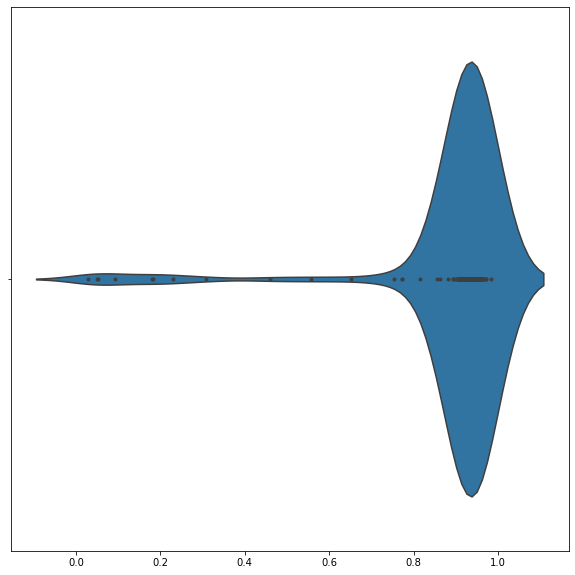

In [68]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=correlation.max(axis=0), inner='point')
plt.show()

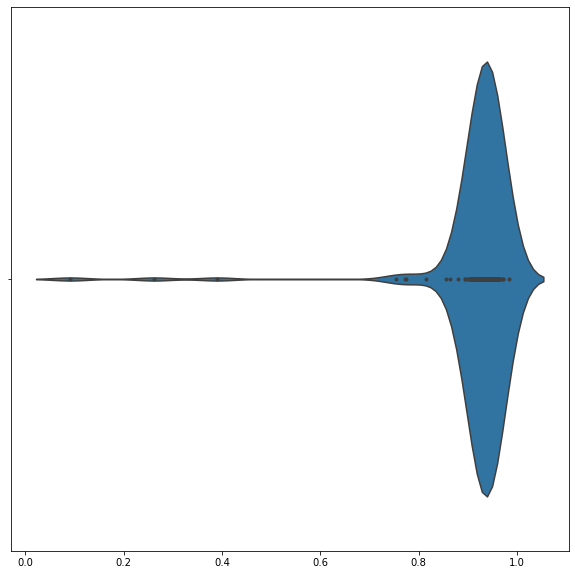

In [69]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=correlation.max(axis=1), inner='point')
plt.show()

In [100]:
big_df = pd.read_csv('/home/MarkF/DivideConquer/Results/MathExperiment/2_Split/One_Normalized/ICARUN_ALL/'
                       'ica_independent_components_consensus.tsv', sep='\t', index_col=0)
# for i in range(1,26):
#     print(i)
#     df = pd.read_csv(f'/home/MarkF/DivideConquer/Results/MathExperiment/2_Split/One_Normalized/ICARUN_ALL/ica_run_{i}_independent_components.tsv',
#                sep='\t', index_col=0)
#     df.columns = [f"{x}_{i}" for x in df.columns]
#     if i == 1:
#         big_df = df
#     else:
#         big_df = big_df.join(df)

In [101]:
for i in range(1,26):
    print(i)
    df = pd.read_csv(f'/home/MarkF/DivideConquer/Results/MathExperiment/2_Split/One_Normalized/ICARUN_SPLIT1/ica_run_{i}_independent_components.tsv',
               sep='\t', index_col=0)
    df.columns = [f"{x}_{i}" for x in df.columns]
    if i == 1:
        small1_df = df
    else:
        small1_df = small1_df.join(df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [102]:
for i in range(1,26):
    print(i)
    df = pd.read_csv(f'/home/MarkF/DivideConquer/Results/MathExperiment/2_Split/One_Normalized/ICARUN_SPLIT2/ica_run_{i}_independent_components.tsv',
               sep='\t', index_col=0)
    df.columns = [f"{x}_{i}" for x in df.columns]
    if i == 1:
        small2_df = df
    else:
        small2_df = small2_df.join(df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [103]:
small1_df.columns = [f'{x}_Set1' for x in small1_df]
small2_df.columns = [f'{x}_Set2' for x in small2_df]

big_df.columns = [f'{x}_Big' for x in big_df]

In [104]:
merged = small1_df.join(small2_df)
merged = merged.join(big_df)

In [105]:
correlation = np.corrcoef(merged.values, rowvar=False)
correlation = np.absolute(correlation)
correlation = pd.DataFrame(correlation, columns=merged.columns, index=merged.columns)

In [152]:
cols = list(small1_df.columns)
cols.extend(list(small2_df.columns))
cols = [x for x in cols if int(x.split('_')[1]) <= 25]

sub_cor = correlation.loc[cols, big_df.columns]

sub_cor.max(axis=0).sort_values()

consensus independent component 165_Big    0.547646
consensus independent component 169_Big    0.589861
consensus independent component 164_Big    0.593118
consensus independent component 171_Big    0.629448
consensus independent component 3_Big      0.646171
                                             ...   
consensus independent component 143_Big    0.879609
consensus independent component 15_Big     0.890706
consensus independent component 111_Big    0.896763
consensus independent component 14_Big     0.903845
consensus independent component 79_Big     0.912262
Length: 171, dtype: float64